In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
from google.colab import drive
drive.mount('lungs-segmentation-master')

Mounted at lungs-segmentation-master


In [7]:
import os

base_dir = '/content/lungs-segmentation-master/MyDrive/lungs-segmentation-master/classifier/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#repertoires avec nos photos(d'entrainement) de chiens et de chats
train_pneumo_dir = os.path.join(train_dir, 'pneumothorax')
train_nopneumo_dir = os.path.join(train_dir, 'nopneumothorax')

#repertoires avec nos photos(de validation) de chiens et de chats
validation_pneumo_dir = os.path.join(validation_dir, 'pneumothorax')
validation_nopneumo_dir = os.path.join(validation_dir, 'nopneumothorax')

OSError: ignored

In [43]:
print('total training pneumothorax images :', len(os.listdir(      train_pneumo_dir ) ))
print('total training nopneumothorax images :', len(os.listdir(      train_nopneumo_dir ) ))

print('total validation pneumothorax images :', len(os.listdir( validation_pneumo_dir ) ))
print('total validation nopneumothorax images :', len(os.listdir( validation_nopneumo_dir ) ))

total training pneumothorax images : 350
total training nopneumothorax images : 1220
total validation pneumothorax images : 42
total validation nopneumothorax images : 489


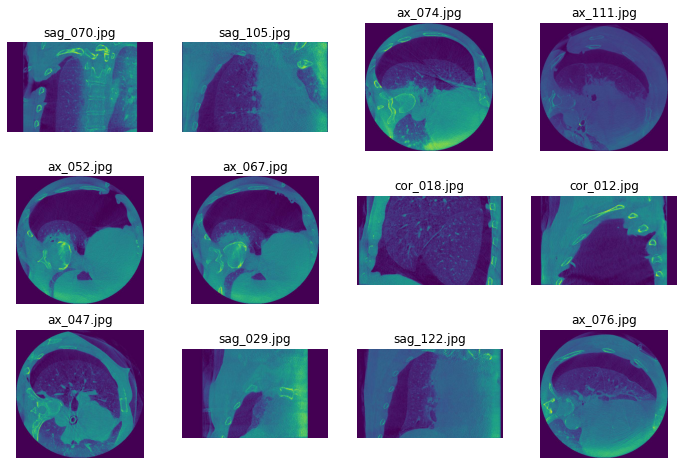

In [10]:
samples_pneumothoraxs = np.random.choice(os.listdir(train_pneumo_dir),size = 12)

plt.figure(figsize = (12,8))
for i,file in enumerate(samples_pneumothoraxs):
    ax = plt.subplot(3,4,i+1)
    img = mpimg.imread(os.path.join(train_pneumo_dir,file))
    plt.axis("off")
    plt.imshow(img)
    ax.set_title(file)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


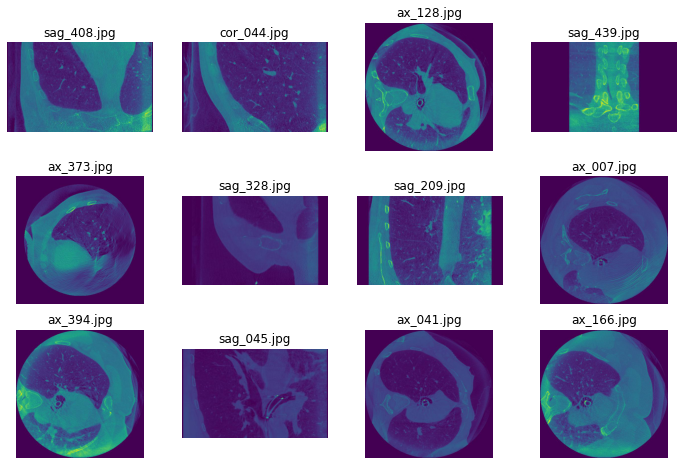

In [11]:
samples_nopneumothoraxs = np.random.choice(os.listdir(train_nopneumo_dir),size = 12)

plt.figure(figsize = (12,8))
for i,file in enumerate(samples_nopneumothoraxs):
    ax = plt.subplot(3,4,i+1)
    img = mpimg.imread(os.path.join(train_nopneumo_dir,file))
    plt.axis("off")
    plt.imshow(img)
    ax.set_title(file)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255.0,      
    rotation_range=40, #va faire une rotation de l'image en choissisant un nb aleatoire entre 0 et 40
    width_shift_range=0.2, #va deplacer l'objet de 20% de sa largeur(il peut etre negatif)
    height_shift_range=0.2,
    shear_range=0.2,#va cisailler l'image de 20% 
    zoom_range=0.2, # pour zoomer dans l'image de 0 a 0.2
    horizontal_flip=True, #va faire une symetrie de l'image suivant la droite qui passe par le centre de l'image
    fill_mode='nearest' #pour specifier comment arranger l'image vu qu'elle va perdre les px apeès nos operations
)

test_datagen = ImageDataGenerator(rescale = 1/255.0)
print(train_dir)
train_generator = train_datagen.flow_from_directory(
    '/content/lungs-segmentation-master/MyDrive/lungs-segmentation-master/classifier/train/',
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 9,
    class_mode = 'binary'
)

/content/lungs-segmentation-master/MyDrive/lungs-segmentation-master/classifier/train
Found 1570 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


In [8]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics = ['acc'])

In [11]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=157,# 2000 images = batch_size * steps
    epochs=10,
    validation_data=validation_generator,
    validation_steps=59 # 1000 images = batch_size * steps
)

Epoch 1/10
157/157 [==============================] - 28s 164ms/step - loss: 0.5702 - acc: 0.7701 - val_loss: 0.4969 - val_acc: 0.9171
Epoch 2/10
157/157 [==============================] - 27s 170ms/step - loss: 0.5303 - acc: 0.7771 - val_loss: 0.4707 - val_acc: 0.8889
Epoch 3/10
157/157 [==============================] - 25s 161ms/step - loss: 0.4851 - acc: 0.7892 - val_loss: 0.3917 - val_acc: 0.8682
Epoch 4/10
157/157 [==============================] - 25s 160ms/step - loss: 0.4069 - acc: 0.8268 - val_loss: 0.2781 - val_acc: 0.8889
Epoch 5/10
157/157 [==============================] - 25s 161ms/step - loss: 0.3289 - acc: 0.8803 - val_loss: 1.0071 - val_acc: 0.5235
Epoch 6/10
157/157 [==============================] - 28s 177ms/step - loss: 0.2770 - acc: 0.8866 - val_loss: 0.3804 - val_acc: 0.8154
Epoch 7/10
157/157 [==============================] - 25s 162ms/step - loss: 0.2522 - acc: 0.9076 - val_loss: 0.7699 - val_acc: 0.6422
Epoch 8/10
157/157 [==============================] - 2

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

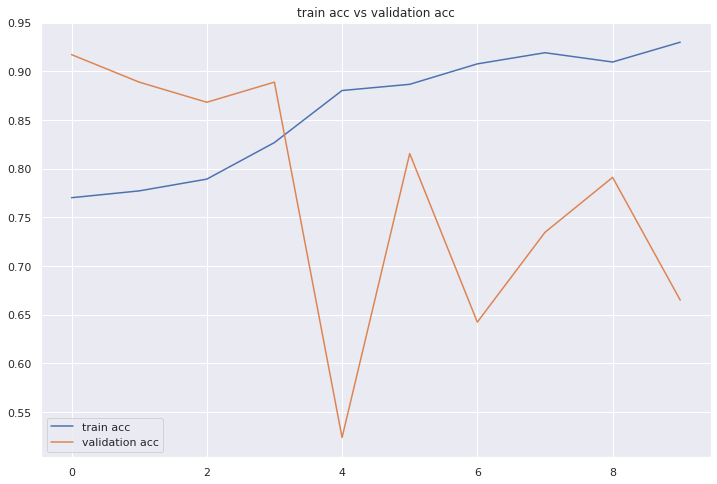

In [29]:
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

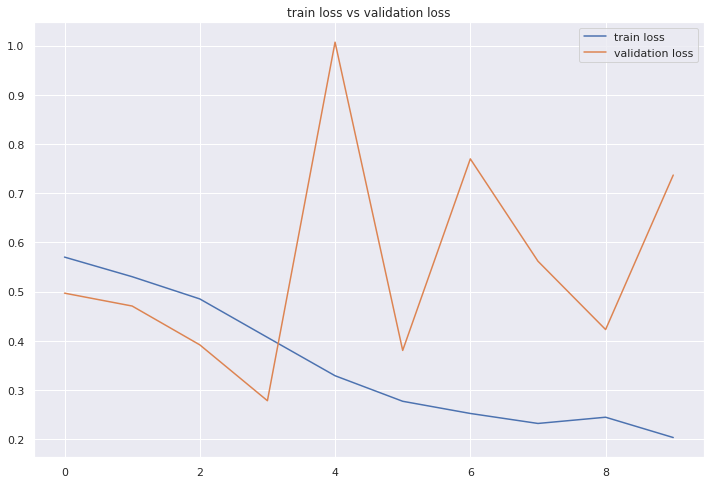

In [30]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

# image augmentation

In [12]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [33]:
from tensorflow.keras.preprocessing import image

sample_cat = np.random.choice(os.listdir(train_pneumo_dir))
img = image.load_img(os.path.join(train_pneumo_dir,sample_cat),target_size = (150,150))
x = image.img_to_array(img)
x = x[np.newaxis]

datagen_img = datagen.flow(x,batch_size = 1)

In [ ]:
x.shape

(1, 150, 150, 3)

(-0.5, 149.5, 149.5, -0.5)

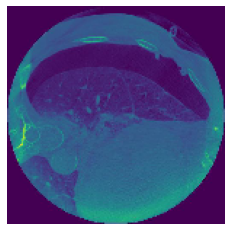

In [34]:
plt.imshow(img)
plt.axis("off")

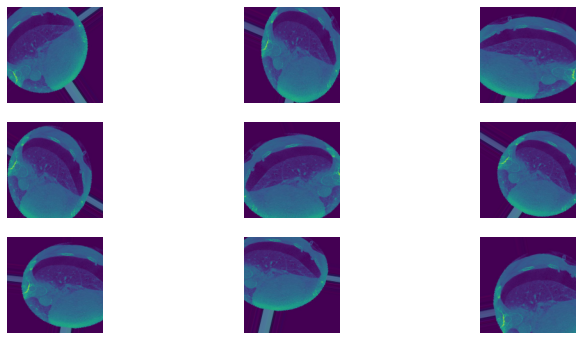

In [35]:
plt.figure(figsize = (12,6))
for i,batch in enumerate(datagen.flow(x,batch_size = 1)):
    
    ax = plt.subplot(3,3,i+1)
    plt.imshow(np.squeeze(batch).astype("int64"))
    plt.axis("off")
    
    if i == 8:
        break
plt.show()

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1/255.0,      
    rotation_range=40, #va faire une rotation de l'image en choissisant un nb aleatoire entre 0 et 40
    width_shift_range=0.2, #va deplacer l'objet de 20% de sa largeur(il peut etre negatif)
    height_shift_range=0.2,
    shear_range=0.2,#va cisailler l'image de 20% 
    zoom_range=0.2, # pour zoomer dans l'image de 0 a 0.2
    horizontal_flip=True, #va faire une symetrie de l'image suivant la droite qui passe par le centre de l'image
    fill_mode='nearest' #pour specifier comment arranger l'image vu qu'elle va perdre les px apeès nos operations
)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 9,
    class_mode = 'binary'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss='binary_crossentropy',metrics = ['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=157,# 2000 images = batch_size * steps
    epochs=50,
    validation_data=validation_generator,
    validation_steps=59 # 1000 images = batch_size * steps
)

Found 1570 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
157/157 [==============================] - 274s 2s/step - loss: 0.5406 - acc: 0.7732 - val_loss: 0.4097 - val_acc: 0.9209
Epoch 2/50
157/157 [==============================] - 22s 143ms/step - loss: 0.5238 - acc: 0.7771 - val_loss: 0.4198 - val_acc: 0.9209
Epoch 3/50
157/157 [==============================] - 22s 143ms/step - loss: 0.5037 - acc: 0.7790 - val_loss: 0.4006 - val_acc: 0.9209
Epoch 4/50
157/157 [==============================] - 22s 143ms/step - loss: 0.4945 - acc: 0.7885 - val_loss: 0.3007 - val_acc: 0.9209
Epoch 5/50
157/157 [==============================] - 22s 143ms/step - loss: 0.4601 - acc: 0.7949 - val_loss: 0.2722 - val_acc: 0.9209
Epoch 6/50
157/157 [==============================] - 22s 142ms/step - loss: 0.4355 - acc: 0.8191 - val_loss: 0.2560 - val_acc: 0.9115
Epoch 7/50
157/157 [==============================] - 22s 141ms/step - loss: 0.3977 - acc: 0.8331 - val_loss: 0.4727 - val_acc: 0.7759
Epoch 8/50
157/157 [==============================] - 22s

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

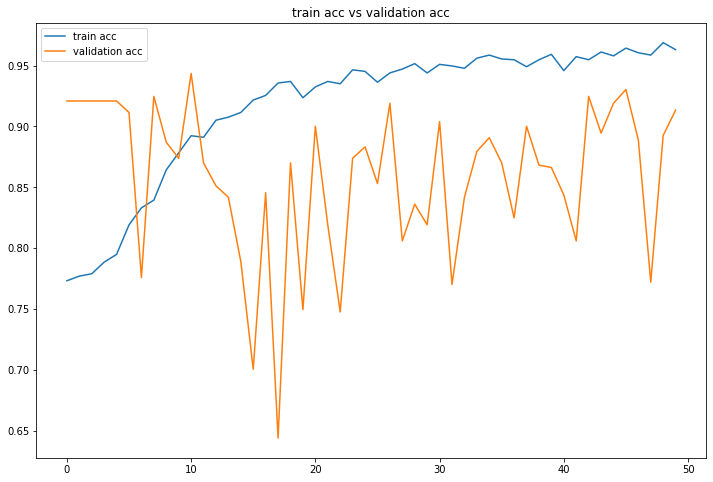

In [15]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

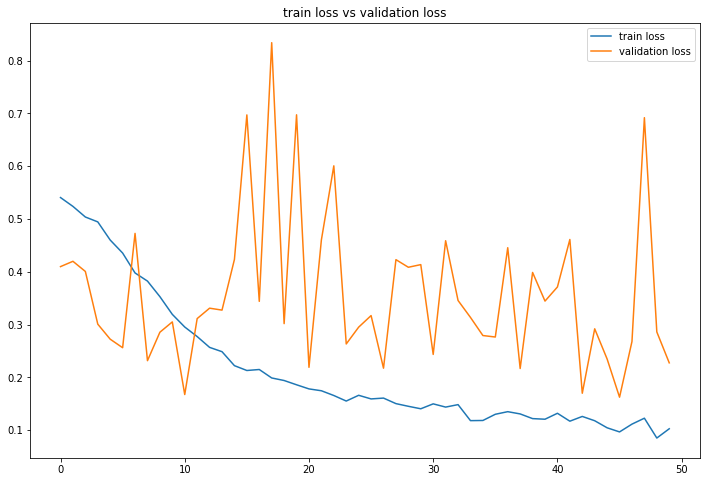

In [16]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

# Prediction

In [39]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/lungs-segmentation-master/MyDrive/lungs-segmentation-master/classifier/test/SliceNoPneu/cor_120.jpg',target_size = (150,150))
x = image.img_to_array(img)
x = x[np.newaxis]

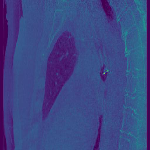

In [40]:
img

In [41]:
x.shape

(1, 150, 150, 3)

In [42]:
model.predict(x)

array([[0.]], dtype=float32)

In [38]:
train_generator.class_indices

{'nopneumothorax': 0, 'pneumothorax': 1}